## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats
import seaborn as sns

In [2]:
# Study data files
mouse_metadata = os.path.join("data", "Mouse_metadata.csv")
study_results = os.path.join("data", "Study_results.csv")

In [3]:
# Read the mouse data and the study results into a pandas dataframe
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [4]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on=("Mouse ID"))
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate Mean
avg_data = merged_data["Tumor Volume (mm3)"].mean()
avg_data

50.448380631336505

In [6]:
# Calculate Median
median_score = merged_data["Tumor Volume (mm3)"].median()
median_score

48.95147442

In [7]:
# Calculate Variance
variance_tumor = np.var(merged_data["Tumor Volume (mm3)"])
variance_tumor

79.07427999025795

In [8]:
# Calculate Standard Deviation
std_tumor = np.std(merged_data["Tumor Volume (mm3)"])
std_tumor

8.892372011463417

In [9]:
# Organize Data
reorg_avg = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"])
reorg_avg.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325

In [10]:
# Organize Data
reorg_median = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).median()["Tumor Volume (mm3)"])
reorg_median.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   45.597064
             10                  43.421014
             15                  42.798160
             20                  40.716428

In [11]:
# Standard Error
reorg_sem = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"])
reorg_sem.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

In [99]:
# Pivot Hierarchical Labels
reorg_avg_data = reorg_avg.unstack(level=0)
reorg_avg_data

Tumor Volume (mm3)                                              \
Drug Regimen          Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                     
0                     45.000000  45.000000  45.000000  45.000000  45.000000   
5                     44.266086  46.503051  46.541247  47.389175  46.796098   
10                    43.084291  48.285125  49.403909  49.582269  48.694210   
15                    42.064317  50.094055  51.296397  52.399974  50.933018   
20                    40.716325  52.157049  53.197691  54.920935  53.644087   
25                    39.939528  54.287674  55.715252  57.678982  56.731968   
30                    38.769339  56.769517  58.299397  60.994507  59.559509   
35                    37.816839  58.827548  60.742461  63.371686  62.685087   
40                    36.958001  61.467895  63.162824  66.068580  65.600754   
45                    36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                     
Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0             45.000000  45.000000  45.000000  45.000000  45.000000  
5             47.125589  47.248967  43.944859  47.470830  46.851818  
10            49.423329  49.101541  42.531957  49.335368  48.689881  
15            51.359742  51.067318  41.495061  51.448025  50.779059  
20            54.364417  53.346737  40.238325  53.970080  53.170334  
25            57.482574  55.504138  38.974300  56.172821  55.432935  
30            59.809063  58.196374  38.703137  59.870528  57.713531  
35            62.420615  60.350199  37.451996  62.432021  60.089372  
40            65.052675  63.045537  36.574081  65.356386  62.916692  
45            68.084082  66.258529  34.955595  68.438310  65.960888

In [13]:
reorg_median_data = reorg_median.unstack(level=0)
reorg_median_data.head()

Tumor Volume (mm3)                                              \
Drug Regimen          Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                     
0                     45.000000  45.000000  45.000000  45.000000  45.000000   
5                     45.597064  46.370798  46.870483  47.059664  46.621301   
10                    43.421014  48.164520  49.471244  49.797416  48.185373   
15                    42.798160  49.746427  51.265440  52.246310  50.666054   
20                    40.716428  52.112973  53.862724  54.250054  52.855576   

                                                                     
Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0             45.000000  45.000000  45.000000  45.000000  45.000000  
5             46.989764  47.115980  45.521875  47.054185  46.736212  
10            49.109721  48.929895  42.832023  48.925056  48.334346  
15            51.271314  51.007258  41.262007  51.166757  50.583557  
20            53.006865  53.744734  40.772803  53.983436  52.693423

In [14]:
sem_data = reorg_sem.unstack(level=0)
sem_data.head()

Tumor Volume (mm3)                                          \
Drug Regimen          Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                 
0                      0.000000  0.000000  0.000000  0.000000  0.000000   
5                      0.448593  0.164505  0.477067  0.264819  0.202385   
10                     0.702684  0.236144  0.282346  0.357421  0.319415   
15                     0.838617  0.332053  0.357705  0.580268  0.444378   
20                     0.909731  0.359482  0.476210  0.726484  0.595260   

                                                                
Drug Regimen   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                       
0             0.000000  0.000000  0.000000  0.000000  0.000000  
5             0.218091  0.231708  0.482955  0.254830  0.188950  
10            0.402064  0.376195  0.720225  0.461474  0.263949  
15            0.614461  0.466109  0.770432  0.532904  0.370544  
20            0.839609  0.555181  0.786199  0.684670  0.533182

In [15]:
# Creating Indexes 
mean_index = reorg_avg.reset_index()
mean_index_table = mean_index.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

sem_index = reorg_sem.reset_index()
sem_index_table = sem_index.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

mean_index_table

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


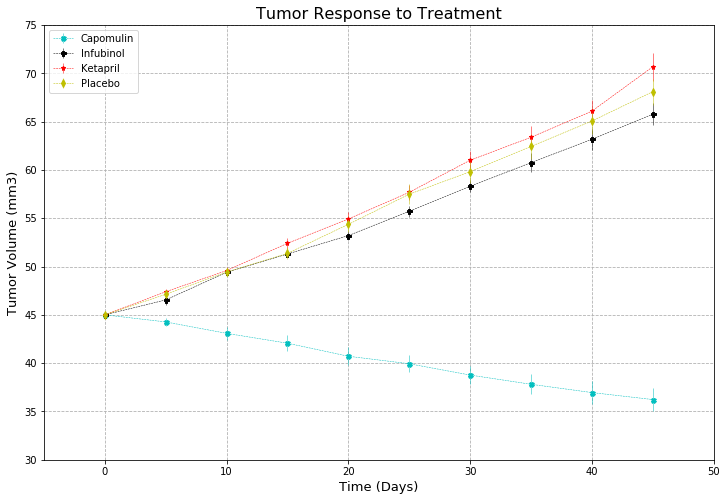

In [16]:
# Plot
plt.figure(figsize=(12,8))

plt.errorbar(mean_index_table.index, mean_index_table["Capomulin"], yerr=sem_index_table["Capomulin"],\
             color="c", marker="X", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_index_table.index, mean_index_table["Infubinol"], yerr=sem_index_table["Infubinol"],\
             color="k", marker="P", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_index_table.index, mean_index_table["Ketapril"],yerr=sem_index_table["Ketapril"],\
             color="r", marker="*", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_index_table.index, mean_index_table["Placebo"],yerr=sem_index_table["Placebo"],\
             color="y", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.ylim(30, 75)
plt.xlim(-5, 50)

plt.title('Tumor Response to Treatment', fontsize=16)
plt.xlabel('Time (Days)', fontsize=13)
plt.ylabel('Tumor Volume (mm3)', fontsize=13)

plt.grid(linestyle="dashed")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="upper left")

## Bar Plots

In [27]:
# Count total mice and organize into categories for total for each Drug Regimen
number_mice = pd.DataFrame(merged_data.groupby(["Drug Regimen"]).count()).reset_index()
number_mice

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [28]:
number_mice_org = number_mice[["Drug Regimen", "Mouse ID"]]
number_mice_org

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [31]:
number_mice_org = number_mice_org.rename(columns={"Mouse ID": "Total Count"})
number_mice_org

,Total Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


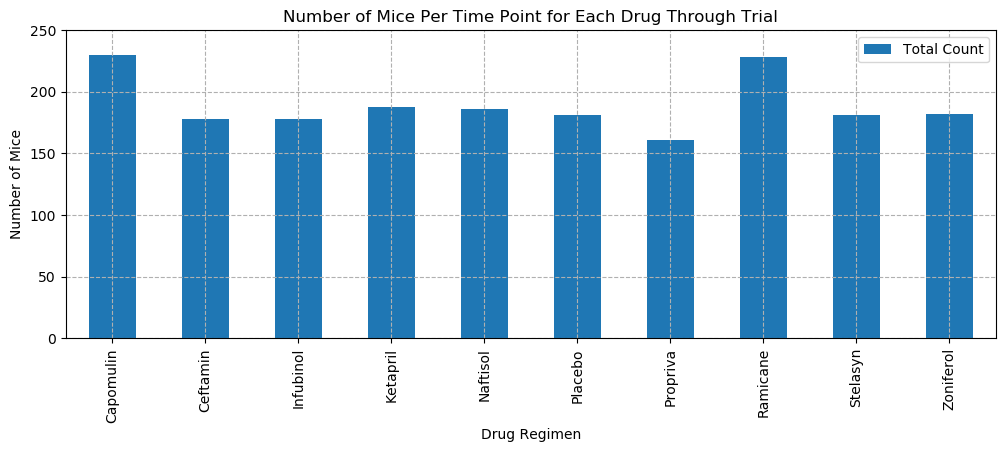

<Figure size 640x480 with 0 Axes>

In [196]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
number_mice_org.plot(kind="bar", figsize=(12,4))

plt.ylim(0, 250)

plt.grid(linestyle="dashed")

plt.title("Number of Mice Per Time Point for Each Drug Through Trial")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

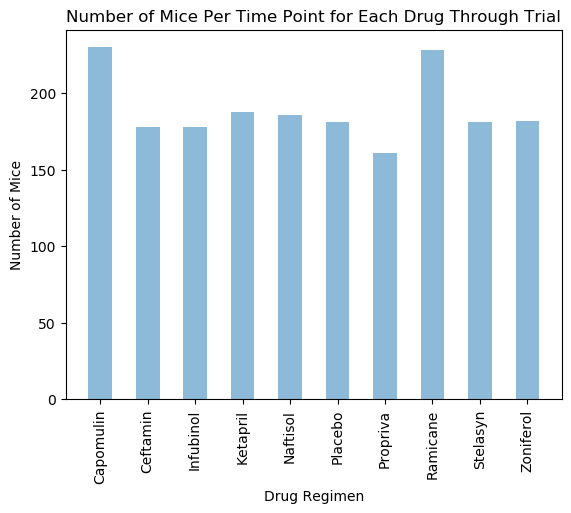

In [197]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (number_mice["Drug Regimen"])

y_pos = np.arange(len(objects))
time_point = number_mice["Timepoint"]

plt.bar(y_pos, time_point, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Per Time Point for Each Drug Through Trial')

plt.show()

## Pie Plots

In [198]:
# Data Frame for Gender Distribution
mice_gender = pd.DataFrame(merged_data.groupby(["Sex"]).count()).reset_index()
mice_gender

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [199]:
mice_gender_org = mice_gender[["Sex", "Mouse ID"]]
mice_gender_org = mice_gender_org.rename(columns={"Mouse ID": "Total Count"})
mice_gender_org

,Sex,Total Count
0,Female,935
1,Male,958


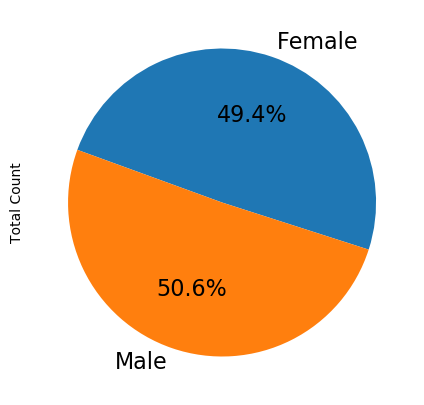

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.
plot = mice_gender_org.plot.pie(y='Total Count', figsize=(5,5), autopct='%1.1f%%', 
 startangle=160, shadow=False, labels=mice_gender_org['Sex'], legend = False, fontsize=16, counterclock=False)

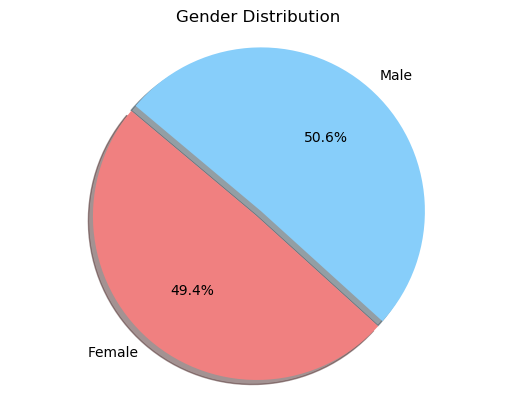

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
import matplotlib.pyplot as plt
sizes = [935, 958]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.04)  

# Plot
plt.pie(sizes, explode=explode, labels=mice_gender_org['Sex'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [202]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [203]:
#Looking at four most promising treatments by avg total volume decrease
reorg_avg_data = reorg_avg.unstack(level=0)
reorg_avg_data

Tumor Volume (mm3)                                              \
Drug Regimen          Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                     
0                     45.000000  45.000000  45.000000  45.000000  45.000000   
5                     44.266086  46.503051  46.541247  47.389175  46.796098   
10                    43.084291  48.285125  49.403909  49.582269  48.694210   
15                    42.064317  50.094055  51.296397  52.399974  50.933018   
20                    40.716325  52.157049  53.197691  54.920935  53.644087   
25                    39.939528  54.287674  55.715252  57.678982  56.731968   
30                    38.769339  56.769517  58.299397  60.994507  59.559509   
35                    37.816839  58.827548  60.742461  63.371686  62.685087   
40                    36.958001  61.467895  63.162824  66.068580  65.600754   
45                    36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                     
Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0             45.000000  45.000000  45.000000  45.000000  45.000000  
5             47.125589  47.248967  43.944859  47.470830  46.851818  
10            49.423329  49.101541  42.531957  49.335368  48.689881  
15            51.359742  51.067318  41.495061  51.448025  50.779059  
20            54.364417  53.346737  40.238325  53.970080  53.170334  
25            57.482574  55.504138  38.974300  56.172821  55.432935  
30            59.809063  58.196374  38.703137  59.870528  57.713531  
35            62.420615  60.350199  37.451996  62.432021  60.089372  
40            65.052675  63.045537  36.574081  65.356386  62.916692  
45            68.084082  66.258529  34.955595  68.438310  65.960888

In [204]:
# Create variables for four drugs that show smallest average tumor size afer max timepoint
cap_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
ram_data = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane",:]
ceft_data = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin",:]
inf_data = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol",:]

In [205]:
# Create DF that sorts Mice that were treated with Capomulin and merge with orginal combined data
cap_org = cap_data.groupby("Mouse ID").max()["Timepoint"]
cap_org = pd.DataFrame(cap_org)
cap_org_merge = pd.merge(cap_org, merged_data, on=("Mouse ID", "Timepoint"))
cap_org_merge.sort_values(by="Tumor Volume (mm3)", ascending=True).head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
16,s185,45,Capomulin,Female,3,17,23.343598,1
11,m601,45,Capomulin,Male,22,17,28.430964,1
23,x401,45,Capomulin,Female,16,15,28.484033,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
19,u364,45,Capomulin,Male,18,17,31.023923,3


In [206]:
# Create DF that sorts Mice that were treated with Ramicane and merge with orginal combined data
ram_org = ram_data.groupby("Mouse ID").max()["Timepoint"]
ram_org = pd.DataFrame(ram_org)
ram_org_merge = pd.merge(ram_org, merged_data, on=("Mouse ID", "Timepoint"))
ram_org_merge.sort_values(by="Tumor Volume (mm3)", ascending=True).head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
13,k403,45,Ramicane,Male,21,16,22.050126,1
8,g791,45,Ramicane,Male,11,16,29.128472,1
20,s508,45,Ramicane,Male,1,17,30.276232,0
14,m546,45,Ramicane,Male,18,16,30.564625,1
24,z578,45,Ramicane,Male,11,16,30.638696,0


In [207]:
# Create DF that sorts Mice that were treated with Ceftamin and merge with orginal combined data
ceft_org = ceft_data.groupby("Mouse ID").max()["Timepoint"]
ceft_org = pd.DataFrame(ceft_org)
ceft_org_merge = pd.merge(ceft_org, merged_data, on=("Mouse ID", "Timepoint"))
ceft_org_merge.sort_values(by="Tumor Volume (mm3)", ascending=True).head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
20,x226,0,Ceftamin,Male,23,28,45.000000,0
1,b447,0,Ceftamin,Male,2,30,45.000000,0
18,u153,0,Ceftamin,Female,11,25,45.000000,0
16,t573,0,Ceftamin,Female,15,27,45.000000,0
10,l558,10,Ceftamin,Female,13,30,46.784535,0


In [208]:
# Create DF that sorts Mice that were treated with Infubinol and merge with orginal combined data
inf_org = inf_data.groupby("Mouse ID").max()["Timepoint"]
inf_org = pd.DataFrame(inf_org)
inf_org_merge = pd.merge(inf_org, merged_data, on=("Mouse ID", "Timepoint"))
inf_org_merge.sort_values(by="Tumor Volume (mm3)", ascending=True).head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
5,c326,5,Infubinol,Female,18,25,36.321346,0
15,o813,5,Infubinol,Male,24,28,45.699331,0
18,v339,5,Infubinol,Male,20,26,46.250112,0
12,m756,5,Infubinol,Male,19,30,47.010364,1
21,w193,20,Infubinol,Male,22,30,50.005138,0


In [209]:
# Determine Cap IQR and Outliers
cap_tum = cap_org_merge["Tumor Volume (mm3)"]
quartiles = cap_tum.quantile([.25,.5,.75])
lowerq_cap = quartiles[0.25]
upperq_cap = quartiles[0.75]
iqr_cap = upperq_cap-lowerq_cap

lower_cap = lowerq_cap - (1.5*iqr_cap)
upper_cap = upperq_cap + (1.5*iqr_cap)
print(f"Outliers are those that lie below {lower_cap} and those that lie above {upper_cap}.")

Outliers are those that lie below 20.70456164999999 and those that lie above 51.83201549.


In [210]:
# Determine Ram IQR and Outliers
ram_tum = ram_org_merge["Tumor Volume (mm3)"]
quartiles = ram_tum.quantile([.25,.5,.75])
lowerq_ram = quartiles[0.25]
upperq_ram = quartiles[0.75]
iqr_ram = upperq_ram-lowerq_ram

lower_ram = lowerq_ram - (1.5*iqr_ram)
upper_ram = upperq_ram + (1.5*iqr_ram)
print(f"Outliers are those that lie below {lower_ram} and those that lie above {upper_ram}.")

Outliers are those that lie below 17.912664470000003 and those that lie above 54.30681135.


In [211]:
# Determine Ceft IQR and Outliers
ceft_tum = ceft_org_merge["Tumor Volume (mm3)"]
quartiles = ceft_tum.quantile([.25,.5,.75])
lowerq_ceft = quartiles[0.25]
upperq_ceft = quartiles[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

lower_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_ceft = upperq_ceft + (1.5*iqr_ceft)
print(f"Outliers are those that lie below {lower_ceft} and those that lie above {upper_ceft}.")

Outliers are those that lie below 25.355449580000002 and those that lie above 87.66645829999999.


In [212]:
# Determine Inf IQR and Outliers
inf_tum = inf_org_merge["Tumor Volume (mm3)"]
quartiles = inf_tum.quantile([.25,.5,.75])
lowerq_inf = quartiles[0.25]
upperq_inf = quartiles[0.75]
iqr_inf = upperq_inf-lowerq_inf

lower_inf = lowerq_inf - (1.5*iqr_inf)
upper_inf = upperq_inf + (1.5*iqr_inf)
print(f"Outliers are those that lie below {lower_inf} and those that lie above {upper_inf}.")

Outliers are those that lie below 36.83290494999999 and those that lie above 82.74144559000001.


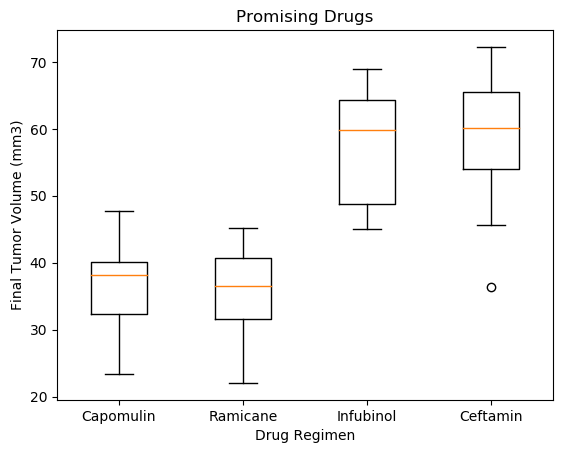

In [213]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
promising_drugs = [cap_tum, ram_tum, ceft_tum, inf_tum]

fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(promising_drugs, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

In [216]:
# Data Frame for time point versus tumor volume for a mouse treated with Capomulin
cap_line_data = merged_data.loc[merged_data["Mouse ID"] == "s185",:]
cap_line_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


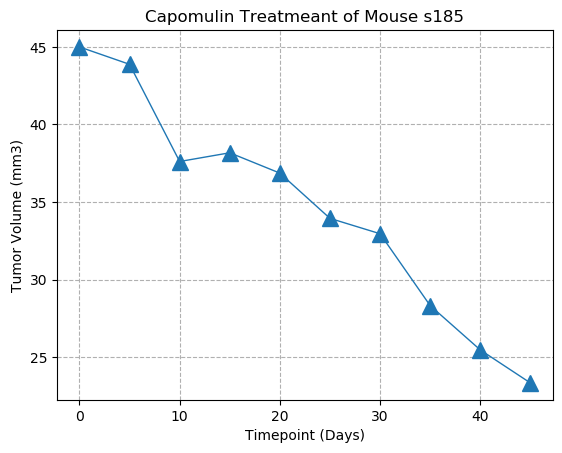

In [217]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_tp = cap_line_data["Timepoint"]
s185_tum_vol = cap_line_data["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of Mouse s185')
plt.plot(s185_tp, s185_tum_vol,linewidth=1, marker='^', markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(linestyle="dashed")

plt.show()

In [218]:
# Data Frame for mouse weight versus average tumor volume for the Capomulin regimen
cap_tum_avg = cap_data.groupby(["Mouse ID"]).mean()
cap_tum_avg.sort_values(by="Weight (g)", ascending=False).head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
r944,12.0,25.0,22.5,43.367364,0.9
r157,22.0,25.0,7.5,45.798970,0.0
i557,1.0,24.0,22.5,44.805810,0.2
w150,23.0,23.0,5.0,41.384825,0.0
j119,7.0,23.0,22.5,44.465236,0.6


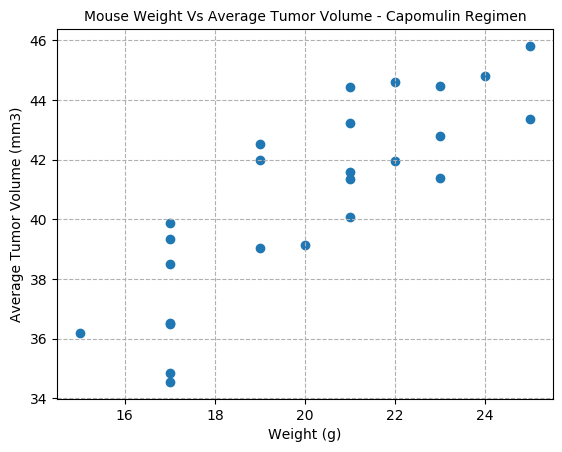

In [219]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(cap_tum_avg['Weight (g)'],cap_tum_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight Vs Average Tumor Volume - Capomulin Regimen', fontsize=10)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(linestyle="dashed")

plt.show()

## Correlation and Regression

In [220]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt

correlation = round(st.pearsonr(cap_tum_avg['Weight (g)'], cap_tum_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin Regimen is {correlation}.")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin Regimen is 0.84.


In [221]:
# Linear Regression
import scipy.stats
from scipy import stats

line_model = st.linregress(cap_tum_avg['Weight (g)'], cap_tum_avg['Tumor Volume (mm3)'])
line_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [222]:
# (y = mx + b) -> we need (mx = slope) and (b = y intercept)
m = 0.9544396890241045
b = 21.552160532685015

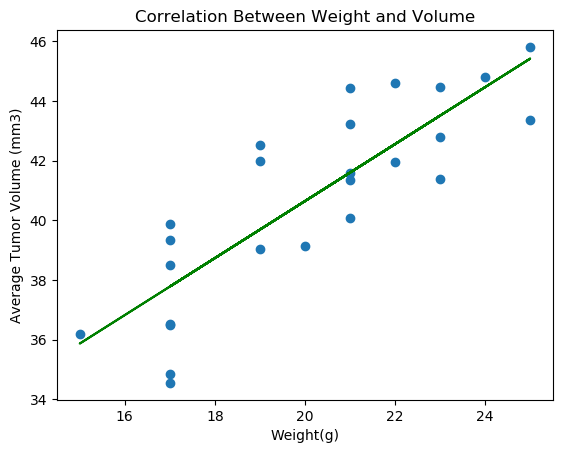

In [223]:
# Plot Linear Regression Model
y_values = cap_tum_avg['Weight (g)'] * m + b

plt.scatter(cap_tum_avg['Weight (g)'], cap_tum_avg['Tumor Volume (mm3)'])
plt.plot(cap_tum_avg['Weight (g)'],y_values,color="green")
plt.title("Correlation Between Weight and Volume")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()